In [57]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df = pd.read_csv("dataset_allsensors (1) (1).csv")

In [64]:
df

,Sample_ID,Pulse(BPM),Temperature,GSR,Emotion
0,1,74,36.6,12.2,Neutral
1,2,87,37.1,14.7,Disgusted
2,3,98,37.2,11.7,Surprised
3,4,90,37.0,15.3,Angry
4,5,96,37.2,11.8,Surprised
...,...,...,...,...,...
2995,2996,92,36.6,22.0,Fearful
2996,2997,99,37.1,17.2,Neutral
2997,2998,100,36.7,11.0,Happy
2998,2999,82,36.7,15.7,Happy


In [65]:
df = df.drop('Sample_ID', axis = 1)

In [66]:
df.shape[0]

3000

In [67]:
df

,Pulse(BPM),Temperature,GSR,Emotion
0,74,36.6,12.2,Neutral
1,87,37.1,14.7,Disgusted
2,98,37.2,11.7,Surprised
3,90,37.0,15.3,Angry
4,96,37.2,11.8,Surprised
...,...,...,...,...
2995,92,36.6,22.0,Fearful
2996,99,37.1,17.2,Neutral
2997,100,36.7,11.0,Happy
2998,82,36.7,15.7,Happy


In [68]:
df['Temperature']

0       36.6
1       37.1
2       37.2
3       37.0
4       37.2
        ... 
2995    36.6
2996    37.1
2997    36.7
2998    36.7
2999    36.8
Name: Temperature, Length: 3000, dtype: float64

In [69]:
df['Temperature'].unique()

array([36.6, 37.1, 37.2, 37. , 36.8, 36.9, 37.3, 36.7, 37.4, 36.5, 37.5])

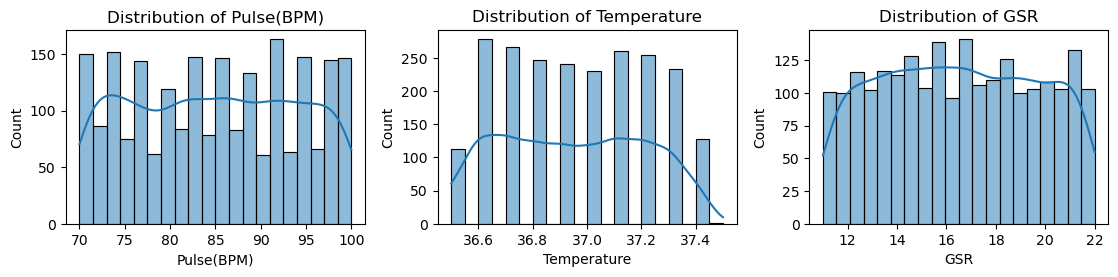

In [72]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(X_train.columns):
    plt.subplot(4, 4, i + 1)
    sns.histplot(X_train[column], bins=20, kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

<AxesSubplot: >

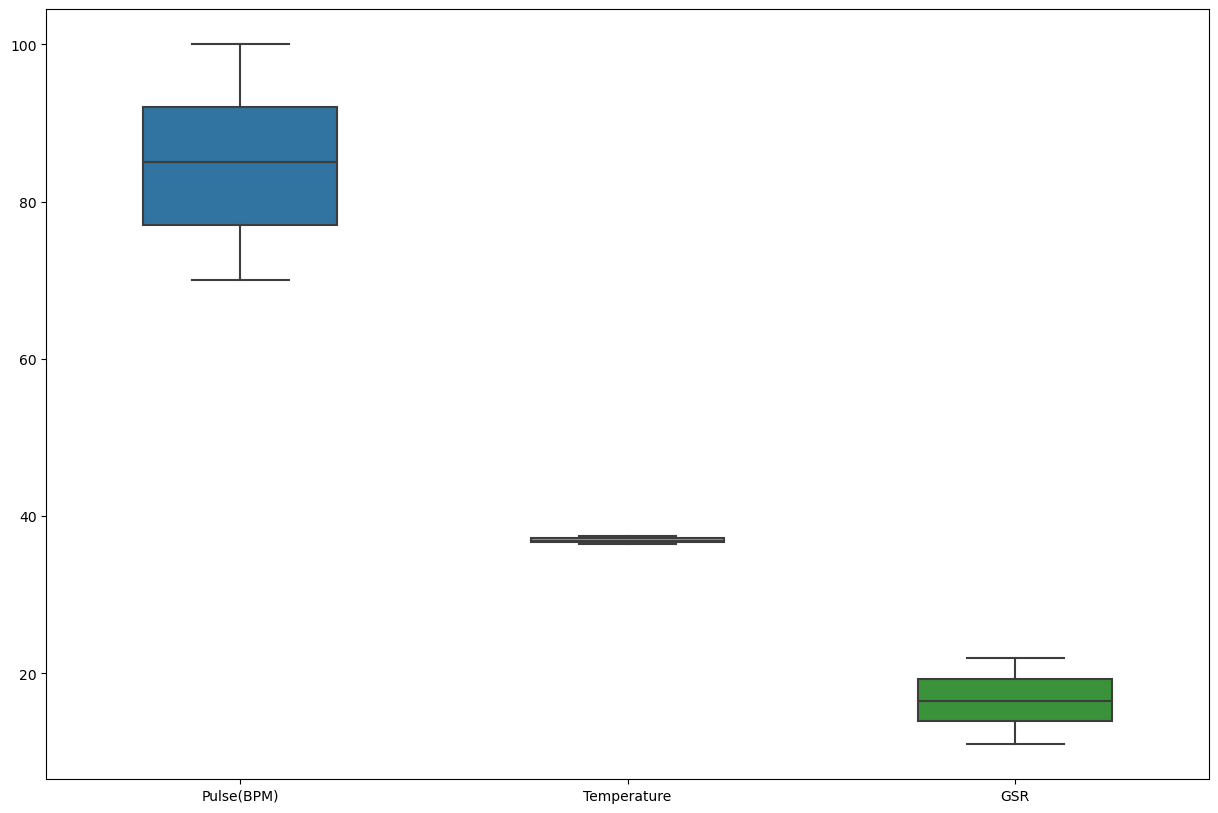

In [46]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

In [47]:
X = df.drop(columns=['Emotion'])
y = df['Emotion']

In [48]:
X

,Pulse(BPM),Temperature,GSR
0,74,36.6,12.2
1,87,37.1,14.7
2,98,37.2,11.7
3,90,37.0,15.3
4,96,37.2,11.8
...,...,...,...
2995,92,36.6,22.0
2996,99,37.1,17.2
2997,100,36.7,11.0
2998,82,36.7,15.7


In [49]:
y

0         Neutral
1       Disgusted
2       Surprised
3           Angry
4       Surprised
          ...    
2995      Fearful
2996      Neutral
2997        Happy
2998        Happy
2999          Sad
Name: Emotion, Length: 3000, dtype: object

In [50]:
y.unique()

array(['Neutral', 'Disgusted', 'Surprised', 'Angry', 'Fearful', 'Sad',
       'Happy'], dtype=object)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)
X_train.shape, X_test.shape

((2250, 3), (750, 3))

In [52]:
X_train.head()

,Pulse(BPM),Temperature,GSR
487,100,37.3,15.8
1489,76,37.4,12.0
1094,71,37.1,16.5
438,82,36.6,13.2
748,92,37.2,21.5


In [53]:
y_train.head()

487       Neutral
1489    Disgusted
1094    Disgusted
438     Surprised
748     Surprised
Name: Emotion, dtype: object

In [54]:
y_train.shape

(2250,)

In [55]:
import pickle

def scaler_standard(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    #saving the model
    file = open('standardScalar.pkl','wb')
    pickle.dump(scaler,file)
    file.close()
    
    return X_train_scaled, X_test_scaled

In [58]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)

<AxesSubplot: >

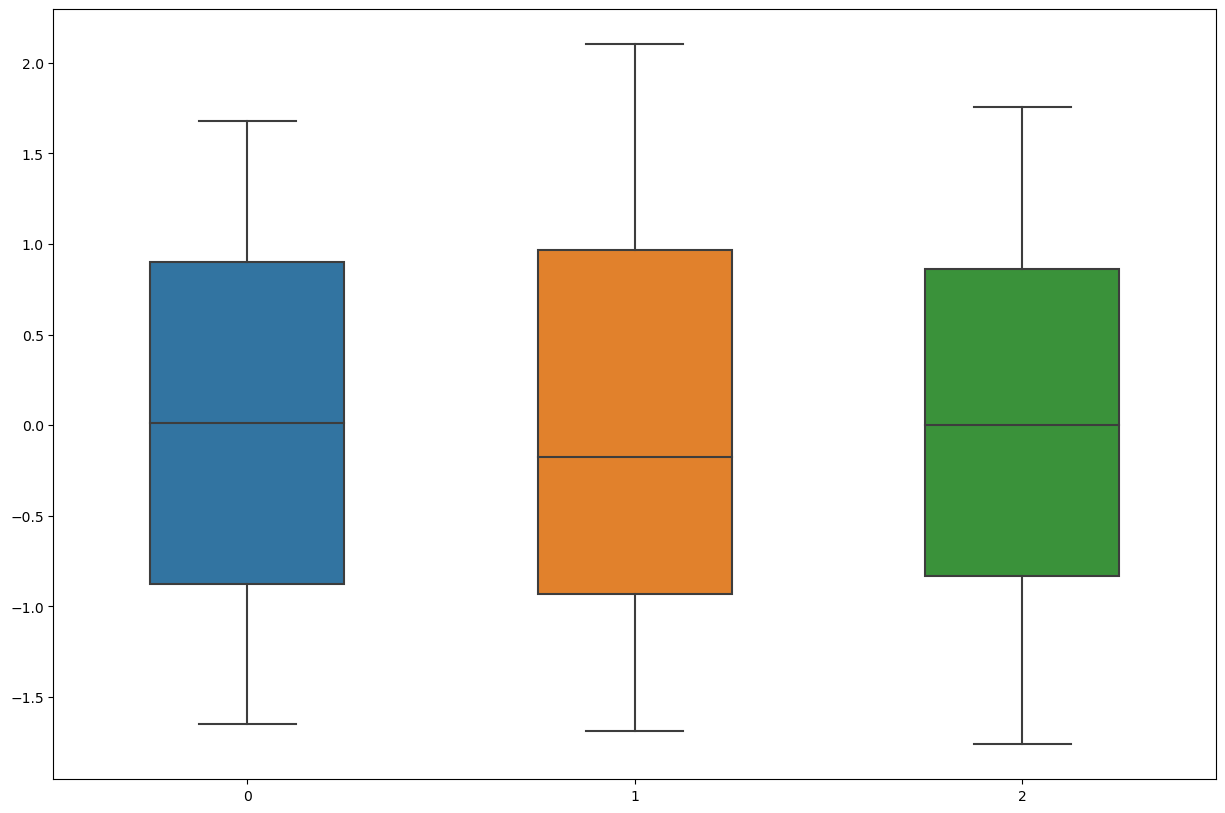

In [59]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=X_train_scaled, width= 0.5,ax=ax,  fliersize=3)

In [60]:
X_train_scaled

array([[ 1.67997094e+00,  1.34411797e+00, -2.24942369e-01],
       [-9.84926265e-01,  1.72324113e+00, -1.44042443e+00],
       [-1.54011318e+00,  5.85871655e-01, -1.03778000e-03],
       ...,
       [ 5.69597102e-01, -1.72374663e-01, -4.48846959e-01],
       [ 1.01374663e+00, -1.72374663e-01, -1.69631538e+00],
       [ 1.01374663e+00, -1.72374663e-01, -1.69631538e+00]])

<AxesSubplot: >

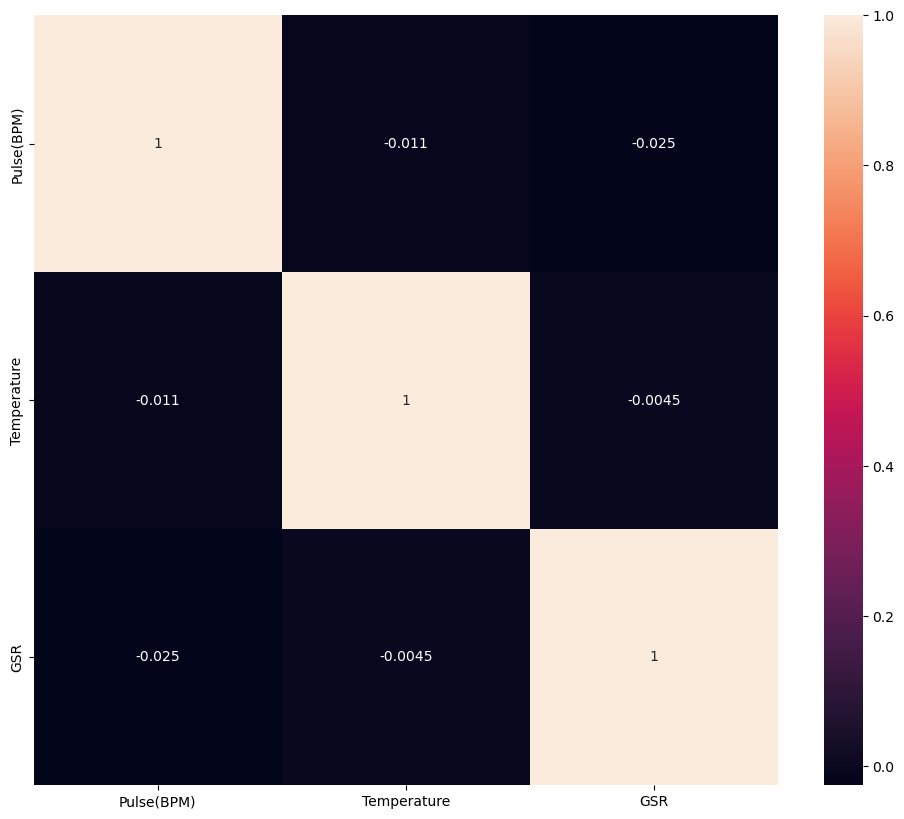

In [61]:
plt.figure(figsize = (12, 10))
corr = X_train.corr()
sns.heatmap(corr, annot = True)

In [62]:
X_train.corr()

,Pulse(BPM),Temperature,GSR
Pulse(BPM),1.000000,-0.010781,-0.025462
Temperature,-0.010781,1.000000,-0.004528
GSR,-0.025462,-0.004528,1.000000


In [35]:
X

,Pulse(BPM),Temperature,GSR
0,74,36.6,12.2
1,87,37.1,14.7
2,98,37.2,11.7
3,90,37.0,15.3
4,96,37.2,11.8
...,...,...,...
2995,92,36.6,22.0
2996,99,37.1,17.2
2997,100,36.7,11.0
2998,82,36.7,15.7


In [36]:
y

0         Neutral
1       Disgusted
2       Surprised
3           Angry
4       Surprised
          ...    
2995      Fearful
2996      Neutral
2997        Happy
2998        Happy
2999          Sad
Name: Emotion, Length: 3000, dtype: object

In [37]:
y.unique()

array(['Neutral', 'Disgusted', 'Surprised', 'Angry', 'Fearful', 'Sad',
       'Happy'], dtype=object)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [39]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)

In [16]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [17]:
y_pred = rf_classifier.predict(X_test)

In [18]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8333333333333334


In [19]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 1 1 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0]
 [0 0 0 0 0 2 0]
 [1 0 0 0 0 0 3]]


In [370]:
import pickle

In [371]:
with open("RF_58.pkl", "wb") as model_file:
    pickle.dump(rf_classifier, model_file)